# TD7 : K plus proches voisins

## 1.1 Méthode des K plus proches voisins

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from src.utils import *

(<Axes: xlabel='X1', ylabel='X2'>, None)

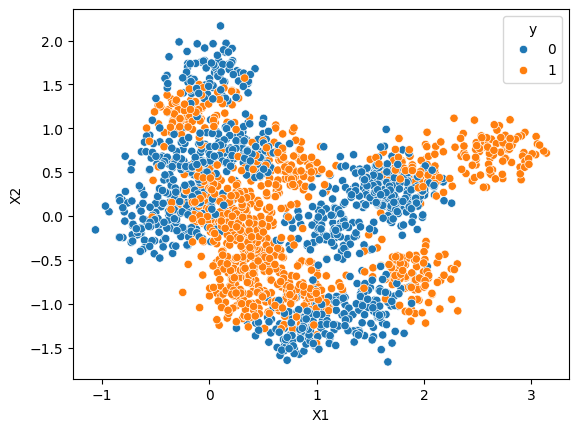

In [18]:
synth = pd.read_csv("data/Synth1-2000.csv")
X = synth.iloc[:, :-1]
y = synth.iloc[:, -1]

plot_clustering(X, y)


C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: xlabel='X1', ylabel='X2'>

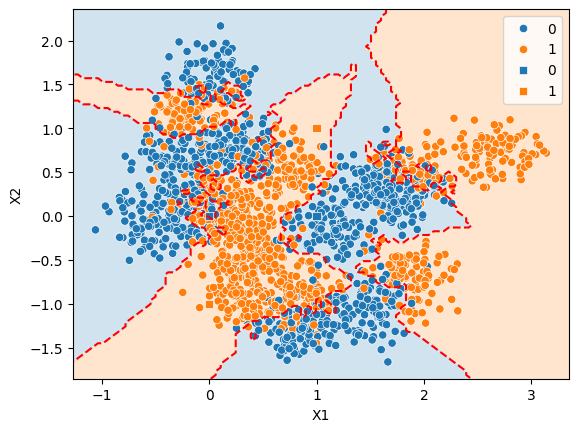

In [19]:
cls = KNeighborsClassifier(n_neighbors=5)
cls.fit(X, y)

ax, pca = plot_clustering(X, y)
Y = np.array([[0, 0], [0, -1], [1, 0], [1, 1]])
pred = cls.predict(Y)
add_decision_boundary(cls)
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=pred, marker="s", ax=ax)


### 1.1.1 Sélection de modèle

In [20]:
from sklearn.model_selection import train_test_split
from src.knn_validation import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [21]:
neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))

gen = knn_simple_validation(X_train, y_train, X_test, y_test, neighbors_list)

results = pd.DataFrame(gen, columns=["k", "accuracy", "ddl"])
results

,k,accuracy,ddl
0,1,0.796102,1333.000000
1,2,0.796102,666.500000
2,3,0.793103,444.333333
3,4,0.799100,333.250000
4,5,0.800600,266.600000
...,...,...,...
66,389,0.580210,3.426735
67,414,0.583208,3.219807
68,441,0.586207,3.022676
69,470,0.580210,2.836170


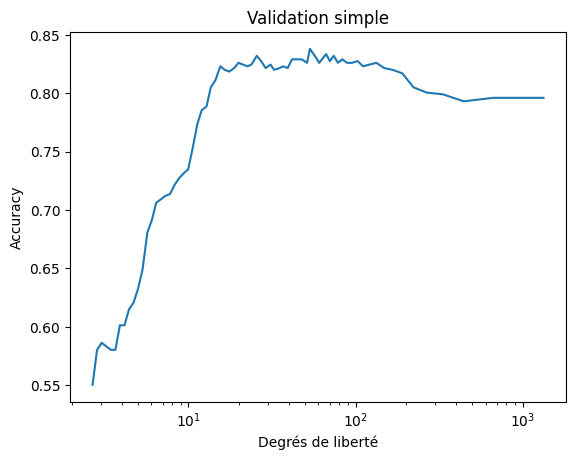

22

In [22]:
sns.lineplot(data = results, x="ddl", y="accuracy", err_style="bars").set(xscale="log", xlabel = "Degrés de liberté", ylabel = "Accuracy", title = "Validation simple")
plt.show()

best_k = results["accuracy"].idxmax()
best_k

In [23]:
gen = knn_multiple_validation(X_train, y_train, 10, 0.9, neighbors_list)

results = pd.DataFrame(gen, columns=["k", "accuracy", "ddl"])
results

,k,accuracy,ddl
0,1,0.791045,1199.000000
1,2,0.805970,599.500000
2,3,0.858209,399.666667
3,4,0.843284,299.750000
4,5,0.865672,239.800000
...,...,...,...
705,389,0.589552,3.082262
706,414,0.582090,2.896135
707,441,0.552239,2.718821
708,470,0.514925,2.551064


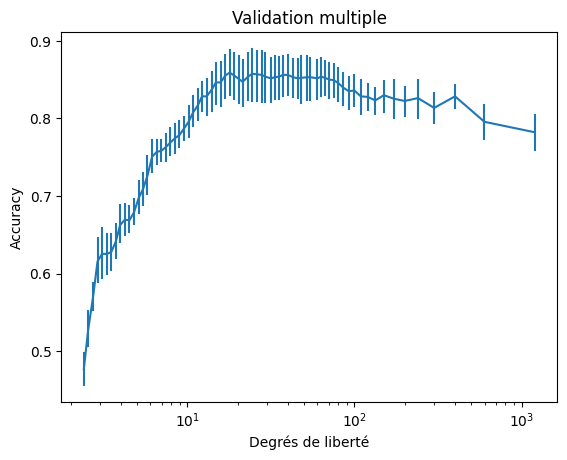

67

In [24]:
sns.lineplot(data = results, x="ddl", y="accuracy", err_style="bars").set(xscale="log", xlabel = "Degrés de liberté", ylabel = "Accuracy", title = "Validation multiple")
plt.show()

best_k = results.groupby("k")["accuracy"].mean().idxmax()
best_k

In [25]:
from src.knn_cross_validation import *

gen = knn_cross_validation(X_train, y_train, 10, neighbors_list)

results = pd.DataFrame(gen, columns=["k", "accuracy", "ddl"])
results

,k,accuracy,ddl
0,1,0.768657,1199.000000
1,2,0.798507,599.500000
2,3,0.820896,399.666667
3,4,0.843284,299.750000
4,5,0.873134,239.800000
...,...,...,...
705,389,0.616541,3.084833
706,414,0.578947,2.898551
707,441,0.518797,2.721088
708,470,0.473684,2.553191


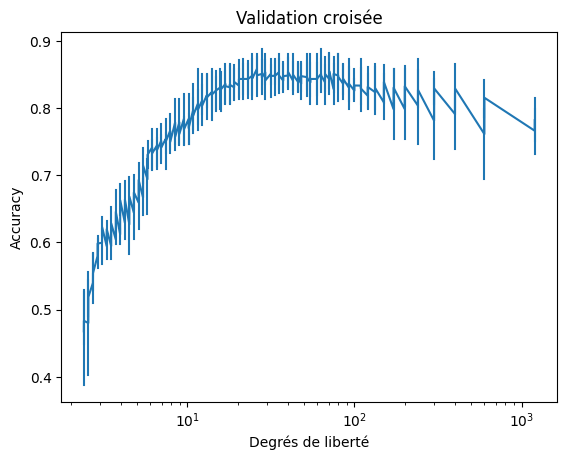

30

In [26]:
sns.lineplot(data = results, x="ddl", y="accuracy", err_style="bars").set(xscale="log", xlabel = "Degrés de liberté", ylabel = "Accuracy", title = "Validation croisée")
plt.show()

best_k = results.groupby("k")["accuracy"].mean().idxmax()
best_k

In [27]:
gen = knn_cross_validation2(X_train, y_train, 5, neighbors_list)

results = pd.DataFrame(gen, columns=["k", "accuracy", "ddl"])
results

,k,accuracy,ddl
0,1,0.756554,1333.000
1,1,0.782772,1333.000
2,1,0.808989,1333.000
3,1,0.789474,1333.000
4,1,0.774436,1333.000
...,...,...,...
350,500,0.438202,2.666
351,500,0.449438,2.666
352,500,0.460674,2.666
353,500,0.533835,2.666


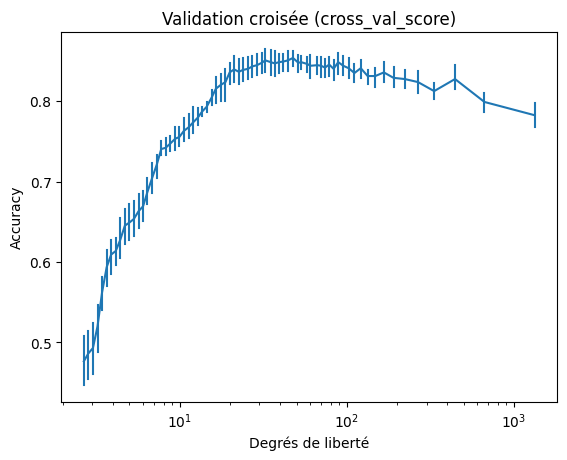

28

In [28]:
sns.lineplot(data = results, x="ddl", y="accuracy", err_style="bars").set(xscale="log", xlabel = "Degrés de liberté", ylabel = "Accuracy", title = "Validation croisée (cross_val_score)")
plt.show()

best_k = results.groupby("k")["accuracy"].mean().idxmax()
best_k

## Recherche du nombre de voisins optimal avec GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": neighbors_list}
cls = KNeighborsClassifier()
grid = GridSearchCV(cls, param_grid)

grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003141,0.001596,0.022460,0.016052,1,{'n_neighbors': 1},0.756554,0.782772,0.808989,0.789474,0.774436,0.782445,0.017254,45
1,0.002445,0.000572,0.011364,0.000765,2,{'n_neighbors': 2},0.775281,0.801498,0.794007,0.812030,0.812030,0.798969,0.013663,42
2,0.001836,0.000724,0.011264,0.000844,3,{'n_neighbors': 3},0.820225,0.823970,0.823970,0.860902,0.808271,0.827468,0.017682,34
3,0.001711,0.000748,0.010761,0.000646,4,{'n_neighbors': 4},0.794007,0.816479,0.805243,0.830827,0.815789,0.812469,0.012306,40
4,0.002475,0.000369,0.009900,0.000393,5,{'n_neighbors': 5},0.801498,0.838951,0.816479,0.842105,0.819549,0.823717,0.015058,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.001985,0.000545,0.022480,0.001288,389,{'n_neighbors': 389},0.546816,0.554307,0.531835,0.593985,0.582707,0.561930,0.023028,67
67,0.002009,0.000611,0.023372,0.000872,414,{'n_neighbors': 414},0.456929,0.531835,0.509363,0.556391,0.545113,0.519926,0.035174,68
68,0.002120,0.000469,0.024255,0.001358,441,{'n_neighbors': 441},0.434457,0.490637,0.471910,0.541353,0.526316,0.492935,0.038277,69
69,0.002198,0.000377,0.026135,0.002516,470,{'n_neighbors': 470},0.441948,0.483146,0.453184,0.533835,0.518797,0.486182,0.035747,70


In [30]:
grid.best_params_

{'n_neighbors': 28}

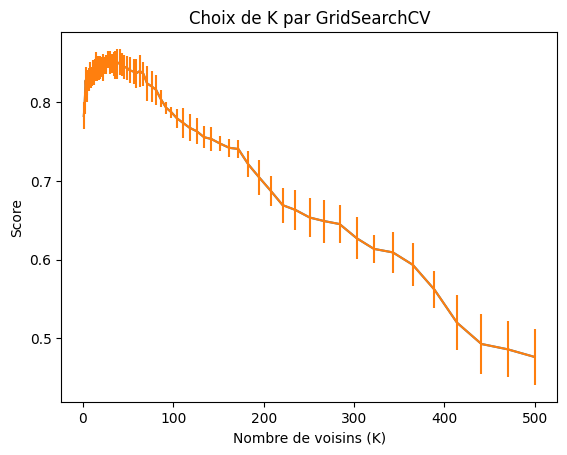

In [31]:
sns.lineplot(data = results, x="param_n_neighbors", y="mean_test_score").set(xlabel = "Nombre de voisins (K)", ylabel = "Score", title = "Choix de K par GridSearchCV")
plt.errorbar(results["param_n_neighbors"], results["mean_test_score"], yerr=results["std_test_score"])
plt.show()

## 1.1.2 Estimation des performances


In [32]:
# Apprentissage du meilleur modèle

cls = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"])
cls.fit(X_train, y_train)

pred = cls.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8290854572713643

## 1.2 Méthode des "K plus proches prototypes"

In [34]:
from src.nearest_prototypes import *

cls = NearestPrototypes(n_neighbors=5)
cls.fit(X_train, y_train)

pred = cls.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

C:\Users\antoi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.800599700149925